# University of Idaho - DMINE Labs
## Agricultural Resilience Data Modeling
## Commodity Model: WHEAT - palouse region
### Erich Seamon, UPDATED: Nov 9, 2016
### erichs@uidaho.edu
### http://dmine.io
### http://erich.io

<br></br>

In [112]:
import PIL
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import os,sys
import numpy as np
from PIL import Image
from urllib2 import urlopen
import os,sys
from PIL import Image


<br></br>
<br></br>

## Introduction

The University of Idaho’s DMINE lab is a grouping of researchers that use data mining and machine learning techniques to explore alterations in our climate.  As part of DMINE labs, we provide linux-based applications and analysis development server access, which we are using to create our data mining and machine learning processes.

Developed as part of a NOAA funded five year effort to understand climate impacts (Climate Impacts Research Consortium – CIRC), DMINE labs creates data mining and machine learning tools using python and R for climate data ingestion and prediction.  In particular, we are working to develop specific ETL processes for each data feed, using RESTful requests when possible.  For each data feed – we are restructuring and transforming the data so it is ready for machine learning.

## DMINE.io

DMINE.io is our web portal where we are exposing our development research work.

<br></br>

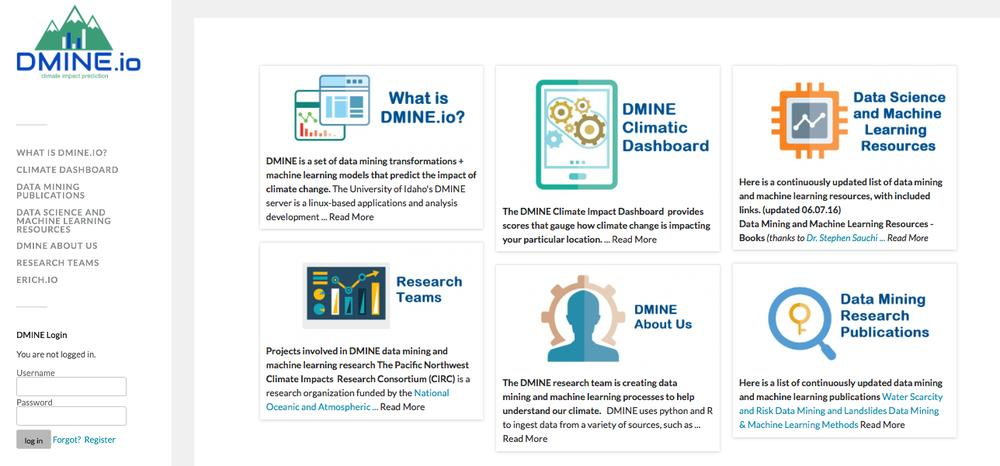

In [113]:
basewidth = 1000
img = Image.open(urlopen("http://dmine.io/wp-content/uploads/2016/06/Screen-Shot-2016-06-10-at-7.35.10-PM.png"))
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
os.chdir("/nethome/erichs/")
img.save("dmine-website-2016.jpg")
jpgfile = Image.open("dmine-website-2016.jpg")
jpgfile

<H2>DMINE Ag Resilience - Data Modeling - Commodity Model: WHEAT</H2>
<H3>Location: Palouse/Inland Northwest ecoregion </H3>

**The Climate Impacts Research Consortium (CIRC)** data mining stream has developed a set of data mining and machine learning processes, in order to provide a basic example of how we might approach climatic impact prediction over space and time.

Our example in this instance is to explore how we might predict economic crop loss, using data that is extracted from differing sources, transformed, and combined with a response variable that is a approximation of economic crop loss, in dollars. This notebook provides an overview of our steps for this example, which include:


**1. Demo Overview (python). ** An overview of the problem, summary of the datasets involved.
   <br> </br> <br></br>
   **2. Exploratory Data Analysis (R).**  After transforming the data, a matrix of all values is generated.  From this dataset, what EDA can we perform that will help us to better understand our hypothesis/es?
   <br></br><br></br>
   **3. Data transformation (R).**  What steps do we need to take to transform and combine data into a form that is ready to machine learning techniques?
   <br></br><br></br>
**4. Machine learning model generation, optimization (python).**  Which model works best?
   <br></br><br></br>
**5. Model Instantiation (python). ** Apply most optimized model to a python API for enabling prediction requests.


<br></br>
<br></br>
<br></br>

## 1. Demo overview: agricultural resilience modeling and water scarcity


 - Climate disruptions to agricultural production have increased over the past 40 years and are projected to increase over the next 25 years. Farmers and ranchers will likely need to increase their rate of innovation and adaptation to keep pace with this projected change.
 
 - Crop and livestock production in many agricultural regions will likely decline due to weeds, diseases, insects, and climate-related stresses.
 
 - The rising incidence of extreme weather—including heat waves, drought, and very heavy precipitation—will increasingly impact crop and livestock productivity.
 
 - Climate-related changes in crop yields and food prices as well as impacts on food processing, storage, and distribution systems can impact food security.
 
 
 ### Problem question: Can we perform data mining techniques to assemble food resilience data - and construct a machine learning model that predicts economic crop loss?
 
 

<br></br>

## Datasets and data sources used as part of the analysis

To be straightforward for the sake of demonstration - we are using two core datasets:
    
- **University of Idaho GRIDMET data.**  Since our CIRC project uses UIdaho GRIDMET/MACA data for a portion of our research efforts, i thought using this as an input dataset might be appropriate.  As a note, we can easily add variables to this grouping that might be from other sources.
- **USDA Economic Crop Loss data.**  The USDA's Risk Management Agency summarizes economic crop loss insurance claims at a county and monthly level, going back to 1980.  This dataset gives a historical view of crop loss, and to a more generalized degree, overall economic food security.  

Transforming both datasets to be spatially and geographically normalized (at the county/monthly/commodity level), we can then integrate into one big matrix.

After performing exploratory data analysis in R - we examined drought claims across the Pacific Northwest to zero in on a specific area or areas of interest. As part of that review, a focus was identified as the Palouse ecoregon area of the Pacific Northwest.  

<br></br>
<br></br>
<br></br>

## 2. Exploratory Data Analysis

Our exploratory analysis 

## 3. Data Transformation

Data transformation was done in R.  The data transformation process includes:

1. Initial data extraction for a specific bounding box location and time frame

<br></br>

## 4. Machine Learning Model Generation 


## Loading libraries and importing data.  

This dataset is a ~14000 record dataset of monthly crop loss and acreage values, that has been integrated with GRIDMET daily data - summarized to monthly, and at a county geographic scale - for only Washington.

## Import Libraries

In [134]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import glob

## Concatenate function to merge many csv files based on commodity

In [136]:
def concatenate(indir="/agmesh-scenarios/scenario_52177/commodity_county/",
                outfile="/agmesh-scenarios/scenario_52177/commodity_county/BARLEY.csv"):
    os.chdir(indir)
    fileList=glob.glob("*_BARLEY.csv")
    dfList=[]
    for filename in fileList:
        print(filename)
        df=pd.read_csv(filename)
        dfList.append(df)
    concatDF=pd.concat(dfList,axis=0)
    concatDF.to_csv(outfile,index=None)

In [137]:
concatenate()

Grant_BARLEY.csv
Asotin_BARLEY.csv
Garfield_BARLEY.csv
Douglas_BARLEY.csv
Clark_BARLEY.csv
Franklin_BARLEY.csv
Chelan_BARLEY.csv
Columbia_BARLEY.csv
Skagit_BARLEY.csv
Adams_BARLEY.csv
Snohomish_BARLEY.csv
Okanogan_BARLEY.csv
Walla Walla_BARLEY.csv
Yakima_BARLEY.csv
Whitman_BARLEY.csv
Whatcom_BARLEY.csv
Grays Harbor_BARLEY.csv
Island_BARLEY.csv
Benton_BARLEY.csv
Klickitat_BARLEY.csv
Lewis_BARLEY.csv
Lincoln_BARLEY.csv
Pacific_BARLEY.csv
Kittitas_BARLEY.csv
Stevens_BARLEY.csv
King_BARLEY.csv
Spokane_BARLEY.csv


In [117]:

os.chdir("/agmesh-scenarios/scenario_52177/commodity_county/")
train = pd.read_csv('WHEAT.csv')
%matplotlib nbagg

In [118]:
train

,Unnamed: 0,year,month,countyfips,bi,pr,th,pdsi,pet,erc,...,commoditycode,commodity,insuranceplancode,insurancename,stagecode,damagecausecode,damagecause,monthcode,acres,loss
0,56,2001,APR,53023,11.727001,2.440722,224.9641,-1.110885,2.558726,18.010435,...,11,WHEAT,44,CRC,H,11,Drought,4,2435.5700,49452.00
1,57,2001,APR,53023,11.727001,2.440722,224.9641,-1.110885,2.558726,18.010435,...,11,WHEAT,90,APH,H,11,Drought,4,1262.8400,15752.00
2,158,2001,FEB,53023,9.076299,1.080538,164.2996,-0.303747,0.850557,11.150315,...,11,WHEAT,44,CRC,H,11,Drought,2,41.2530,1757.70
3,215,2001,JUL,53023,33.921385,0.491931,248.8742,-1.771163,5.533266,53.382325,...,11,WHEAT,44,CRC,H,11,Drought,7,441.0200,2184.00
4,321,2001,JUN,53023,23.624079,1.090826,215.2165,-1.676560,4.538130,40.353032,...,11,WHEAT,44,CRC,H,11,Drought,6,959.6100,18740.00
5,518,2001,MAY,53023,26.114881,1.005050,223.3017,-1.037864,4.828936,36.826068,...,11,WHEAT,44,CRC,H,12,Heat,5,645.7210,25254.70
6,519,2001,MAY,53023,26.114881,1.005050,223.3017,-1.037864,4.828936,36.826068,...,11,WHEAT,44,CRC,H,11,Drought,5,1439.9860,57550.60
7,521,2001,MAY,53023,26.114881,1.005050,223.3017,-1.037864,4.828936,36.826068,...,11,WHEAT,90,APH,H,11,Drought,5,1464.5900,32700.00
8,723,2001,SEP,53023,45.451330,0.299244,220.1036,-2.117002,4.177972,66.329668,...,11,WHEAT,90,APH,H,11,Drought,9,48.0000,470.00
9,903,2002,AUG,53023,46.187239,0.523307,249.6020,-0.565620,5.359987,63.674880,...,11,WHEAT,44,CRC,H,11,Drought,8,556.5000,3880.00


In [119]:

train = train.loc[train['month'] == 'JUN']

In [120]:
train

,Unnamed: 0,year,month,countyfips,bi,pr,th,pdsi,pet,erc,...,commoditycode,commodity,insuranceplancode,insurancename,stagecode,damagecausecode,damagecause,monthcode,acres,loss
4,321,2001,JUN,53023,23.624079,1.090826,215.21650,-1.676560,4.538130,40.353032,...,11,WHEAT,44,CRC,H,11,Drought,6,959.6100,18740.00
18,1148,2002,JUN,53023,26.106073,1.482216,221.50720,-0.451116,5.037786,39.006710,...,11,WHEAT,44,CRC,H,31,Excess Moisture/Precip/Rain,6,146.6100,3251.00
19,1149,2002,JUN,53023,26.106073,1.482216,221.50720,-0.451116,5.037786,39.006710,...,11,WHEAT,90,APH,H,12,Heat,6,469.9200,3790.00
20,1151,2002,JUN,53023,26.106073,1.482216,221.50720,-0.451116,5.037786,39.006710,...,11,WHEAT,90,APH,H,11,Drought,6,2397.7500,76615.00
21,1152,2002,JUN,53023,26.106073,1.482216,221.50720,-0.451116,5.037786,39.006710,...,11,WHEAT,44,CRC,H,12,Heat,6,18.4200,1686.00
22,1155,2002,JUN,53023,26.106073,1.482216,221.50720,-0.451116,5.037786,39.006710,...,11,WHEAT,44,CRC,H,44,Cold Wet Weather,6,132.5300,2027.00
23,1156,2002,JUN,53023,26.106073,1.482216,221.50720,-0.451116,5.037786,39.006710,...,11,WHEAT,44,CRC,H,11,Drought,6,6318.7830,267493.80
29,1907,2003,JUN,53023,37.929362,0.130551,238.45720,1.539214,5.662824,51.496253,...,11,WHEAT,44,CRC,H,11,Drought,6,802.1500,30114.60
30,1910,2003,JUN,53023,37.929362,0.130551,238.45720,1.539214,5.662824,51.496253,...,11,WHEAT,90,APH,H,11,Drought,6,114.2100,1804.00
31,1911,2003,JUN,53023,37.929362,0.130551,238.45720,1.539214,5.662824,51.496253,...,11,WHEAT,90,APH,H,12,Heat,6,185.3940,3408.60


In [121]:
# create column vectors
# all columns
all_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']

# only feature columns
feature_cols1 = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'acres', 'loss']

feature_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres']

matrix_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'loss']
matrix_withlog_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'loss', 'logloss']

matrix_less_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax']
all_minus_cols = ['countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode']

#--------

# Creating X for machine learning for joining with dummy fields

X_climate = train[feature_cols]
Xpre = stats.zscore(X_climate)
Xpre = pd.DataFrame(X_climate)
X1 = train[all_minus_cols]
X1 = pd.DataFrame(X1)
X = pd.concat([Xpre, X1], axis=1)

# create dummy code columns

monthcode_dummies = pd.get_dummies(X['monthcode'])
damagecause_dummies = pd.get_dummies(X['damagecausecode'])
insuranceplancode_dummies = pd.get_dummies(X['insuranceplancode'])
#commodity_dummies = pd.get_dummies(X['commoditycode'])
stagecode_dummies = pd.get_dummies(X['stagecode'])
#countyfips_dummies = pd.get_dummies(X['countyfips'])
#year_dummies = pd.get_dummies(X['year'])


In [122]:
#-generate zscores for all the x climate data variables.  Adds a '_zscore' to the end of the column name

for col in Xpre:
    col_zscore = col + '_zscore'
    Xpre[col_zscore] = (Xpre[col] - Xpre[col].mean())/Xpre[col].std(ddof=0)


In [123]:
Xpre_standard = Xpre.ix[:,16:]


## Rename dummy variables

In [124]:
monthcode_dummies = monthcode_dummies.rename(columns={1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec', '11': 'nov'})
damagecause_dummies = damagecause_dummies.rename(columns={'11': 'drought', '12': 'heat', '43': 'cold winter', '21': 'hail', '41': 'frost', '1': 'decline in price', '81': 'plant disease', '42': 'freeze', '31': 'excess moisture/precip/rain', '51': 'flood', '61': 'wind/excess wind', '71': 'insects', '44': 'cold wet weather', '91': 'fire', '13': 'failure irrig supply', '99': 'other(snow-lightning-etc)', '01': 'decline in price', '93': 'wildlife', '63': 'cyclone', '87': 'falling numbers', '14': 'failure irrig equip', 'XX': 'other causes', '62': 'hot wind'})
insuranceplancode_dummies = insuranceplancode_dummies.rename(columns={44: 'CRC', 42: 'IP', 90: 'APH', 1: 'YP', 2: 'RP', 3: 'RPHPE'})


In [125]:
# Put the dummy code data together

dummies = pd.concat([monthcode_dummies, damagecause_dummies, insuranceplancode_dummies, stagecode_dummies], axis=1)

In [126]:
#  merge dummies with X

Xm_standard = pd.concat([Xpre_standard, dummies], axis=1)
#Xm_standard = pd.DataFrame(stats.zscore(Xm))

# ***** Xm_standard becomes the final X response vector for our machine learning model *****

# create response vector (y)

y = train.loss
y = pd.Series.to_frame(y)
#y = stats.zscore(y)
#y = np.ravel(y)

#-log transform crop loss data for boxplot

ylog = np.log(y)
ylog.columns = ['logloss']

# create standardized dataset
standardized = pd.concat([X, y], axis=1)
standardized_withlog = pd.concat([X, y, ylog], axis=1)
#standardized_withlog.columns = matrix_withlog_cols
standardized.columns = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']


# actual dataset, not normalized
actual = pd.concat([train[feature_cols], train[all_minus_cols], y],  axis=1)
actual.columns = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']
actual_log = pd.concat([actual, ylog],  axis=1)

In [127]:
#-generate zscores for all the x climate data variables.  Adds a '_zscore' to the end of the column name

for col in y:
    col_zscore = col + '_zscore'
    y[col_zscore] = (y[col] - y[col].mean())/y[col].std(ddof=0)

In [128]:
y_standard = y['loss']
y_zscore = y['loss_zscore']
y = y_standard

### Normalize Y

In [129]:
# convert y series to a data frame

y_zscore = pd.Series.to_frame(y_zscore)

### List y columns 

In [130]:
y_zscore.columns.unique()

array(['loss_zscore'], dtype=object)

### List X normalized columns

In [131]:
dummies.columns

Index([u'jun', u'decline in price', u'decline in price', u'drought', u'heat',
       u'failure irrig supply', u'hail', u'excess moisture/precip/rain',
       u'frost', u'freeze', u'cold winter', u'cold wet weather', u'flood',
       u'wind/excess wind', u'hot wind', u'cyclone', u'insects',
       u'plant disease', u'fire', u'wildlife', u'other(snow-lightning-etc)',
       u'other causes', u'YP', u'RP', u'RPHPE', u'IP', u'CRC', u'APH', u'H',
       u'P', u'P2', u'UH'],
      dtype='object')

# Exploratory Data Analysis

In [132]:
# Put Xm_standard and y_zscore together, for EDA
train_EDA = pd.concat([Xm_standard, y_zscore],  axis=1)

## All Wheat Loss by Year for Washington, 2001-2015

<IPython.core.display.Javascript object>


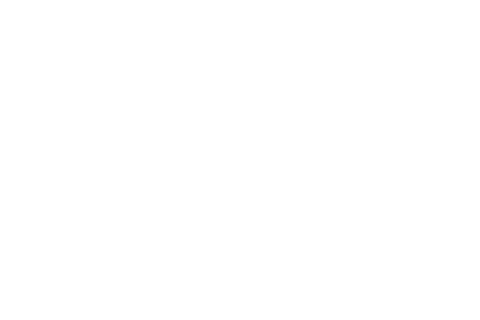

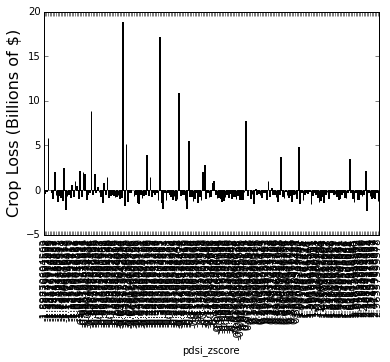

In [56]:
%matplotlib nbagg

train_EDA.groupby(['pdsi_zscore']).loss_zscore.sum().plot(kind='bar')
plt.ylabel('Crop Loss (Billions of $)', fontsize=16)


## All Loss by Commodity for Washington, 2001-2015

<IPython.core.display.Javascript object>


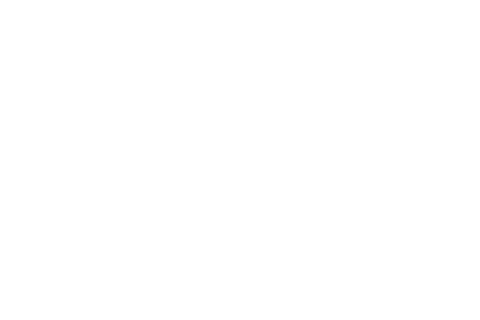

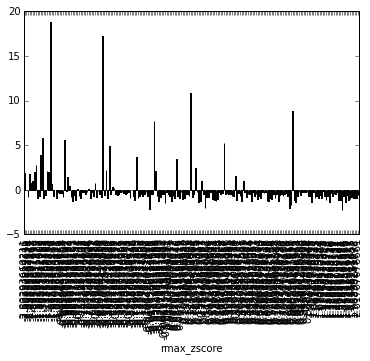

In [133]:
%matplotlib nbagg
train_EDA.groupby(['rmax_zscore']).loss_zscore.sum().plot(kind='bar')

## Histogram of loss by County, Washington, 2001 - 2015.  Are there many small claims, a few large claims by county?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ba80e82d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7bebcd4090>]], dtype=object)

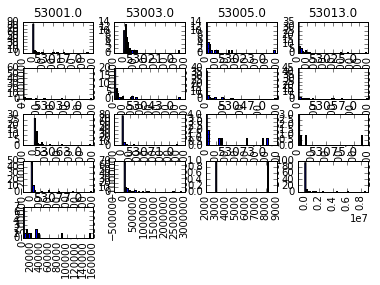

In [58]:
%matplotlib inline
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

actual.hist(column='loss', by='countyfips', grid=False, bins=50)


## Box Plot of Wheat crop loss by month, Washington, 2001 - 2015 - by year - using log tranformed data

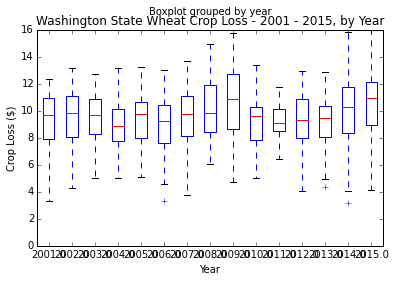

In [59]:
%matplotlib inline

from pylab import *
from scipy.io import loadmat

actual_log.boxplot(column='logloss', by='year', grid=False)
# labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
# xticks(range(1,13),labels, rotation=15)
xlabel('Year')
ylabel('Crop Loss ($)')
title('Washington State Wheat Crop Loss - 2001 - 2015, by Year')

## Box Plot of Wheat crop loss by damage cause, Washington, 2001 - 2015 - by year - using log tranformed data

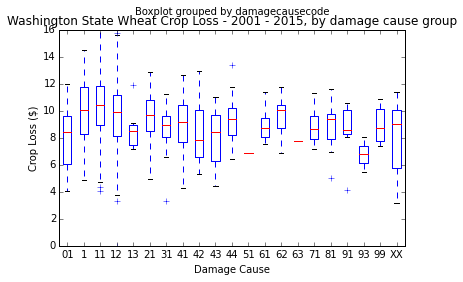

In [60]:
%matplotlib inline

from pylab import *
from scipy.io import loadmat

actual_log.boxplot(column='logloss', by='damagecausecode', grid=False)
# labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
# xticks(range(1,13),labels, rotation=15)
xlabel('Damage Cause')
ylabel('Crop Loss ($)')
title('Washington State Wheat Crop Loss - 2001 - 2015, by damage cause group')

## Setup Training and Testing
### Xm_standard - X vector, normalized
### y_zscore - y vector, normalized

In [61]:
Xm_standard = Xm_standard.drop('acres_zscore', 1)
Xpre_standard = Xpre_standard.drop('acres_zscore', 1)

In [98]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_climate, y)

## Actual observations, Washington, 2001 - 2015, with no z score standardization

In [63]:
actual.head()

,bi,pr,pdsi,pet,erc,th,vs,fm1000,fm100,srad,...,rmax,acres,countyfips,year,monthcode,damagecausecode,insuranceplancode,commoditycode,stagecode,loss
4,23.624079,1.090826,-1.676560,4.538130,40.353032,215.2165,3.371515,13.879166,11.832873,270.85818,...,77.91179,959.61,53023,2001,6,11,44,11,H,18740
18,26.106073,1.482216,-0.451116,5.037786,39.006710,221.5072,3.541995,14.832599,12.059449,290.28439,...,76.94127,146.61,53023,2002,6,31,44,11,H,3251
19,26.106073,1.482216,-0.451116,5.037786,39.006710,221.5072,3.541995,14.832599,12.059449,290.28439,...,76.94127,469.92,53023,2002,6,12,90,11,H,3790
20,26.106073,1.482216,-0.451116,5.037786,39.006710,221.5072,3.541995,14.832599,12.059449,290.28439,...,76.94127,2397.75,53023,2002,6,11,90,11,H,76615
21,26.106073,1.482216,-0.451116,5.037786,39.006710,221.5072,3.541995,14.832599,12.059449,290.28439,...,76.94127,18.42,53023,2002,6,12,44,11,H,1686


## Observations, Washingtion, 2001 - 2015, with all climate data converted to z-scores

In [64]:
Xm_standard.columns

Index([u'bi_zscore', u'pr_zscore', u'pdsi_zscore', u'pet_zscore',
       u'erc_zscore', u'th_zscore', u'vs_zscore', u'fm1000_zscore',
       u'fm100_zscore', u'srad_zscore', u'sph_zscore', u'tmmx_zscore',
       u'tmmn_zscore', u'rmin_zscore', u'rmax_zscore', u'jun',
       u'decline in price', u'decline in price', u'drought', u'heat',
       u'failure irrig supply', u'hail', u'excess moisture/precip/rain',
       u'frost', u'freeze', u'cold winter', u'cold wet weather', u'flood',
       u'wind/excess wind', u'hot wind', u'cyclone', u'insects',
       u'plant disease', u'fire', u'wildlife', u'other(snow-lightning-etc)',
       u'other causes', u'YP', u'RP', u'RPHPE', u'IP', u'CRC', u'APH', u'H',
       u'P', u'P2', u'UH'],
      dtype='object')

In [110]:
Xm_standard()

TypeError: 'DataFrame' object is not callable

In [111]:
Xm_standard()

TypeError: 'DataFrame' object is not callable

# Machine Learning Analysis

### Remove acreage as a feature variable.  

In [ ]:
X = Xm_standard
y = y_zscore

## Building a regression decision tree in scikit-learn

In [99]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [106]:
# use 10 fold CV to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, Xpre_standard, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

659739.92859024752

In [108]:
y

,loss
4,18740.00
18,3251.00
19,3790.00
20,76615.00
21,1686.00
22,2027.00
23,267493.80
29,30114.60
30,1804.00
31,3408.60


In [92]:
X

,bi,pr,pdsi,pet,erc,th,vs,fm1000,fm100,srad,...,rmin,rmax,acres,countyfips,year,monthcode,damagecausecode,insuranceplancode,commoditycode,stagecode
4,23.624079,1.090826,-1.676560,4.538130,40.353032,215.21650,3.371515,13.879166,11.832873,270.85818,...,39.57178,77.91179,959.6100,53023,2001,6,11,44,11,H
18,26.106073,1.482216,-0.451116,5.037786,39.006710,221.50720,3.541995,14.832599,12.059449,290.28439,...,38.10789,76.94127,146.6100,53023,2002,6,31,44,11,H
19,26.106073,1.482216,-0.451116,5.037786,39.006710,221.50720,3.541995,14.832599,12.059449,290.28439,...,38.10789,76.94127,469.9200,53023,2002,6,12,90,11,H
20,26.106073,1.482216,-0.451116,5.037786,39.006710,221.50720,3.541995,14.832599,12.059449,290.28439,...,38.10789,76.94127,2397.7500,53023,2002,6,11,90,11,H
21,26.106073,1.482216,-0.451116,5.037786,39.006710,221.50720,3.541995,14.832599,12.059449,290.28439,...,38.10789,76.94127,18.4200,53023,2002,6,12,44,11,H
22,26.106073,1.482216,-0.451116,5.037786,39.006710,221.50720,3.541995,14.832599,12.059449,290.28439,...,38.10789,76.94127,132.5300,53023,2002,6,44,44,11,H
23,26.106073,1.482216,-0.451116,5.037786,39.006710,221.50720,3.541995,14.832599,12.059449,290.28439,...,38.10789,76.94127,6318.7830,53023,2002,6,11,44,11,H
29,37.929362,0.130551,1.539214,5.662824,51.496253,238.45720,3.311280,12.637377,9.236231,309.78122,...,31.98295,67.89911,802.1500,53023,2003,6,11,44,11,H
30,37.929362,0.130551,1.539214,5.662824,51.496253,238.45720,3.311280,12.637377,9.236231,309.78122,...,31.98295,67.89911,114.2100,53023,2003,6,11,90,11,H
31,37.929362,0.130551,1.539214,5.662824,51.496253,238.45720,3.311280,12.637377,9.236231,309.78122,...,31.98295,67.89911,185.3940,53023,2003,6,12,90,11,H


## Tuning regression tree

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [72]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
scores = cross_val_score(treereg, Xpre_standard, y_zscore, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.90728402106484796

## Looping thru a set number of max_depths to see the optimum level

In [70]:
# list of values to try
max_depth_range = range(1, 50)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, Xpre_standard, y_zscore, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
RMSE_scores

<IPython.core.display.Javascript object>


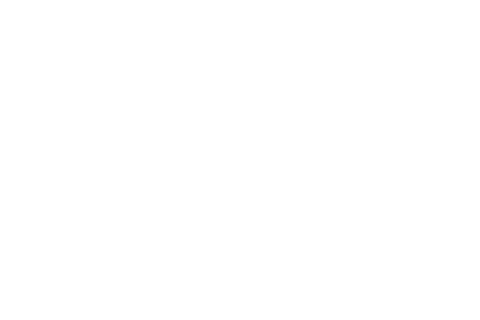

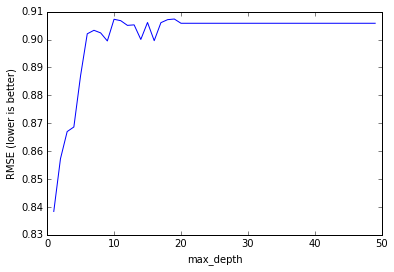

In [71]:
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

#### NRMSE = RMSE/(max(DV)-min(DV)) 

In [ ]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
treereg.fit(Xm_standard, y_zscore)

## Decision Tree Feature Importance determination

In [ ]:
cols = Xm_standard.columns

In [ ]:
cols

In [ ]:
pd.set_option('display.max_rows', 640)
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
importance = pd.DataFrame({'feature':cols, 'importance':treereg.feature_importances_})


In [ ]:
importance

In examining the above feature importance table, these variables appear to be the most significant with regards to crop loss:

- pdsi - Palmer Drought Suitability Index
- srad - Solar radiation
- decline in price - a dummy variable of damage cause.  Decline in Price is a type of damage that a farmer would declare as the reason for his insurance claim.  

    
    

In [ ]:
sig_feature_cols = ['pdsi_zscore', 'decline in price', 'srad']
X_sig = train[feature_cols]


## Creating a tree diagram

In [ ]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='/home/git/dmine/circ/tree_ag.dot', feature_names=cols)
#export_graphviz(treereg, out_file='tree_ag.dot')

#print fileconvert
# At the command line, run this to convert to PNG:
#dot -Tpng tree_ag.dot -o tree_ag.png

In [ ]:
%system("dot -Tpng /home/git/dmine/circ/tree_ag.dot -o /home/git/dmine/circ/tree_ag_wheat.png")

In [ ]:

graph.draw('tree_ag_wheat.png')

In [ ]:
from IPython.display import Image
Image(filename='/home/git/dmine/circ/tree_ag_wheat.png')

## Making predictions for the testing data

**Question:** Using the tree diagram above, what predictions will the model make for each observation?

In [ ]:
y_pred = treereg.predict(X_test)
y_pred

In [ ]:
from sklearn import metrics
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
# calculate RMSE for your own tree!
#y_test = []
#y_pred = []
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

## Random Forest

In [ ]:
rf_range = range(1, 50)
rf_scores = []
for k in rf_range:
    rfreg = RandomForestRegressor(n_estimators=k, random_state=42)
    rfa_fit = rfreg.fit(Xpre_standard,y_zscore)
    rfa_scores = rfa_fit.score(X_test, y_test)
    rf_scores.append(rfa_scores.mean())

In [ ]:
import matplotlib
%matplotlib nbagg
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(rf_range, rf_scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')

## Optimized Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfor = RandomForestRegressor(max_depth = 15)
rforfit = rfor.fit(Xpre_standard,y_zscore)
result14 = rforfit.score(X_test,y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result14, 4)
print "The time it takes to run is:"


In [ ]:
rfor_range = range(1, 50)
rfor_scores = []

for k in rfor_range:
    rfreg = RandomForestRegressor(n_estimators=k, random_state=42)
    rfa_fit = rfreg.fit(Xpre_standard,y_zscore)
    rfa_scores = rfa_fit.score(X_test, y_test)
    rfor_scores.append(rfa_scores.mean())

In [ ]:
import matplotlib
%matplotlib nbagg
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(rfor_range, rfor_scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')

### Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV
np.mean(cross_val_score(RidgeCV(), Xpre_standard, y_zscore, scoring='mean_squared_error'))

## Find Optimal K in KNN

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
x = range(1, 25)
knnoptim = []
for k in x:
    knno = KNeighborsRegressor(n_neighbors = k)
    kfit = knno.fit(Xpre_standard,y_zscore)
    scores = kfit.score(X_test, y_test)
    knnoptim.append(scores)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, knnoptim, color = 'orange', linewidth = 2)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

### K Nearest Neighbors rerun with N = 10, as determined from above accuracy testing

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knnfit = knn.fit(Xpre_standard,y_zscore)
result =  knnfit.score(X_test, y_test)
print "The accuracy score selected with logistic regression is:"
print round(result, 4)
print "The time it took to run is:"

### Find optimal max depth for Regression Decision tree

Here we iterate thru a set of ranges for maximum depth of a decision tree, to see what is the optimum depth

In [ ]:
from sklearn.tree import DecisionTreeRegressor
deep = range(1, 100)
treeoptim = []
for i in deep:
    treee = DecisionTreeRegressor(random_state = 22, max_depth = i)
    treefit = treee.fit(Xpre_standard,y_zscore)
    treescore = treefit.score(X_test, y_test)
    treeoptim.append(treescore)

In [ ]:
plt.plot(deep, treeoptim, color = 'coral', linewidth = 2)
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')

### Optimized Regression Decision Tree

Here we run a regression decision tree with a max depth of 20, as indicated from above accuracy testing

In [ ]:
treee = DecisionTreeRegressor(random_state = 1, max_depth = 3)
treefit = treee.fit(Xpre_standard,y_zscore)
treescore = treefit.score(X_test, y_test)
print "The accuracy score for variables selected using a Regression Decision Tree is:"
treescore

## Ensemble methods - Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(max_samples = 640, random_state = 22)
bagfit = bag.fit(Xpre_standard, y_zscore)
result12 = bagfit.score(X_test, y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result12, 4)
print "The time it takes to run is:"

## Extremely Randomized Trees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor(random_state = 40, min_samples_split=1, bootstrap = True, max_depth = 3)
etreefit = etree.fit(Xpre_standard,y_zscore)
result16 = etreefit.score(X_test, y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result16, 4)
print "The time it takes to run is:"